In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# World Happiness Report - Data Collection

In [3]:
df1=pd.read_csv("happiness_score_dataset.csv")
df1.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
##Checking the shape of the dataset
df1.shape

(158, 12)

There are 158 rows and 12 columns

In [6]:
#checking the datatype of each column
df1.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
#Complete information about the dataset
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
#Checking the null values in the dataset
df1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

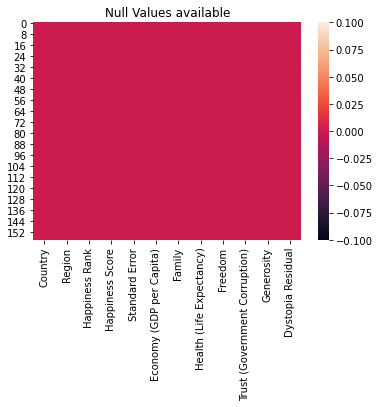

In [12]:
sns.heatmap(df1.isnull())
plt.title("Null Values available")
plt.show()

No Null values present

In [13]:
#Checking the correlation of dependent variable with the dependent variable
corr=df1.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


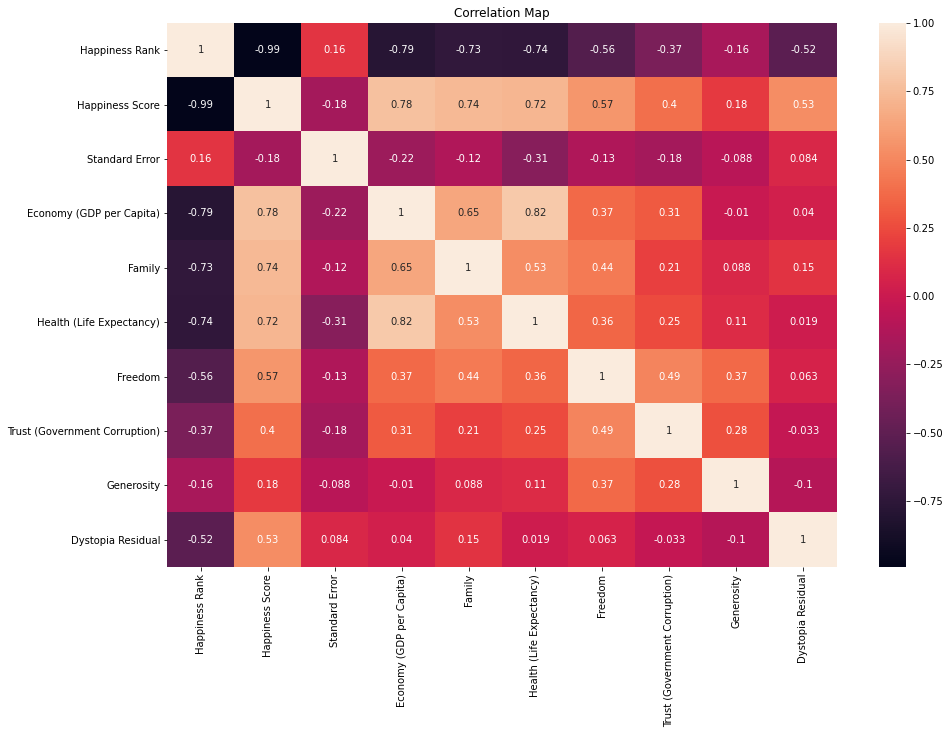

In [12]:
plt.figure(figsize=[15,10])
sns.heatmap(corr,annot=True)
plt.title("Correlation Map")
plt.show()

In [14]:
df1.drop("Country",axis=1,inplace=True)

In [15]:
df1.drop("Region",axis=1,inplace=True)

As "Country" and "Region" is not contributing a lot to our dataset so we can drop them for the ease of ourMachine learning model.

In [16]:
df1.head(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [17]:
#Checking the skewness in the dataset
df1.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

SKewness is present in some of the columns of the datset.

In [18]:
#Removing the Skewness by using power transformation
from sklearn.preprocessing import power_transform
df1_new=power_transform(df1)
df1_new=pd.DataFrame(df1_new,columns=df1.columns)

In [19]:
df1_new.skew()

Happiness Rank                  -0.264365
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

Skewness is succeffully removed from the dataset.

# Checking the Outliers in the Dataset 

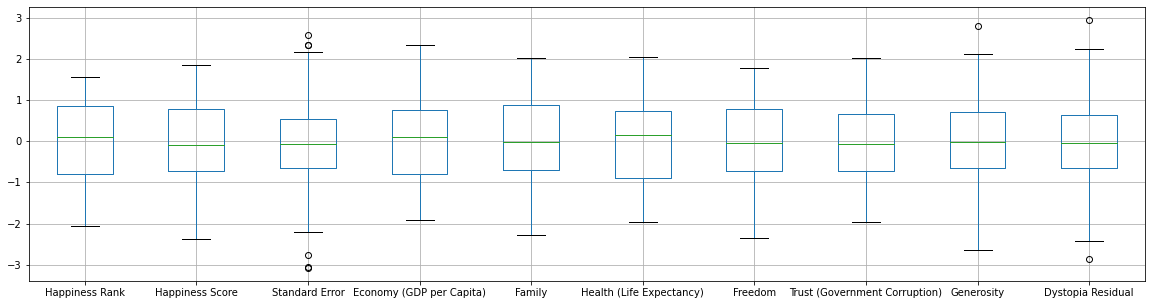

In [20]:
df1_new.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

There are few outliers present but they can be ignore as they are very near to the whiskers.
If they are too many outliers near the whiskers as well then it is require to remove them as well.

In [21]:
x=df1_new.drop("Happiness Score",axis=1)

In [22]:
y=df1_new["Happiness Score"]

In [23]:
x.shape

(158, 9)

In [24]:
y.shape

(158,)

Transoforming the dataset into train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.43,random_state=74)

In [26]:
#Scaling the dataset for proper learning of the ML model.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_test=sc.transform(x_test)

In [27]:
x_train.shape

(90, 9)

In [28]:
x_test.shape

(68, 9)

In [29]:
y_train.shape

(90,)

In [30]:
y_test.shape

(68,)


# Creating the Machine Learning model

As it is continous type of dataset, we will use Regression type of Machine learning models here.

In [41]:
#Linear Regression Model
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Accuracy Score of LinearRegressor: ",lr.score(x_train,y_train)*100)

Accuracy Score of LinearRegressor:  98.87303508313752


In [32]:
lr.coef_

array([-0.27302914, -0.00635582,  0.29865039,  0.16305269,  0.12846429,
        0.1156484 ,  0.01670343,  0.03460146,  0.34450825])

In [33]:
lr.intercept_

-0.004643186897950565

In [34]:
y_pred=lr.predict(x_test)
y_pred

array([-1.49518798, -1.15065794, -0.63463011, -1.37320756, -0.66619287,
       -0.81046686, -1.02306913,  1.1403315 , -0.64093656,  0.6619131 ,
        1.37065771, -0.99279095, -0.21040314,  1.58317879, -0.6280377 ,
       -0.28302315, -0.06469934, -0.95899056,  0.15805549, -1.87024336,
       -0.43548752, -0.26093535, -1.86412821, -1.60495425, -1.31981409,
        1.41775925,  1.7828122 ,  1.69587823, -0.67192246, -0.17335617,
        0.40372527,  1.8662425 ,  1.13210572,  0.01632401,  0.05314312,
       -0.71675359,  1.21535753,  1.57182779,  1.5353559 , -1.27341901,
        0.07304061, -0.96248877,  1.69025385, -1.45123155,  0.38228931,
        1.69870681,  0.50384992,  0.54327435, -0.39187207,  1.31011657,
        0.24468926,  0.02492821,  0.36310028, -1.34204824,  0.51860819,
       -0.35926437,  0.88236638,  0.49275585, -0.26246016,  1.39826418,
       -0.54772735,  1.7299901 , -1.33238897, -0.69092323,  0.52132384,
        0.7982204 , -1.43343584, -0.13602155])

In [35]:
y_test

145   -1.431383
135   -1.147450
104   -0.489092
141   -1.312638
109   -0.581642
         ...   
119   -0.736333
55     0.427126
36     0.821443
148   -1.542441
76    -0.045520
Name: Happiness Score, Length: 68, dtype: float64

In [37]:
#Support vector Regression
from sklearn.svm import SVR
svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
print("Accuracy Score: ", svr.score(x_train,y_train)*100)
#9.135

Accuracy Score:  98.26619931412446


In [40]:
#from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators = 100)
rfr.fit(x_train,y_train)
print("Accuracy Score for RandomForestRegressor: ",rfr.score(x_train,y_train)*100)

Accuracy Score for RandomForestRegressor:  99.86476313441165




All the three above ML models are giving very good results, but this might be due to overfiiting or underfitting.
Lets check the Mean Squared error and Root mean Squared Error

In [42]:
#Importing MSE
from sklearn.metrics import mean_squared_error

In [43]:
#RMSE for LinearRegressor model
lr_mse=mean_squared_error(y_test,y_pred)
lr_rmse=np.sqrt(lr_mse) 

In [44]:
print("Mean Square Error for LR: ",lr_mse*100)
print("Root Mean Square Error for LR: ",lr_rmse*100)

Mean Square Error for LR:  1.747387503390542
Root Mean Square Error for LR:  13.218878558298892


In [45]:
svr_mse=mean_squared_error(y_test,svr.predict(x_test))
svr_rmse=np.sqrt(svr_mse) 

In [47]:
print("Mean Square Error for SVR: ",svr_mse*100)
print("Root Mean Square Error for SVR: ",svr_rmse*100)

Mean Square Error for SVR:  6.836190774258776
Root Mean Square Error for SVR:  26.14611017772773


In [48]:
rfr_mse=mean_squared_error(y_test,rfr.predict(x_test))
rfr_rmse=np.sqrt(rfr_mse) 

In [49]:
print("Mean Square Error for LR: ",rfr_mse*100)
print("Root Mean Square Error for LR: ",rfr_rmse*100)

Mean Square Error for LR:  0.6585704661455969
Root Mean Square Error for LR:  8.115235462668947


RFR is the best model

# Choosing the Best Model

In [51]:
#Checking the Score for Linear Regressor model after removing overffiting or underfiiting
lr_bst=(lr.score(x_train,y_train)*100)-(lr_rmse*100)
print("Correct score for Linear Regressor Model: ",lr_bst)

Correct score for Linear Regressor Model:  85.65415652483863


In [52]:
#Checking the Score for support vector Regressor model after removing overffiting or underfiiting
svr_bst=(svr.score(x_train,y_train)*100)-(svr_rmse*100)
print("Correct score for Support vector Regressor Model: ",svr_bst)

Correct score for Support vector Regressor Model:  72.12008913639673


In [53]:
#Checking the Score for Random Forest Regressor model after removing overffiting or underfiiting
rfr_bst=(rfr.score(x_train,y_train)*100)-(rfr_rmse*100)
print("Correct score for Random Forest Regressor Model: ",rfr_bst)

Correct score for Random Forest Regressor Model:  91.7495276717427


### From the above observation, we can say that Random Forest Regressor is the best Machine Learning Model for this Dataset

# 


# Saving the Model

In [54]:
import joblib
joblib.dump(rfr_bst,"happiness_score_dataset_final.pkl")

['happiness_score_dataset_final.pkl']